# ISLR- Python: Ch3 -- Applied Question 15

- [Load Dataset](#Load-Dataset)
- [Univariate Linear Regressions](#Univariate-Linear-Regressions)
- [Multiple Linear Regression](Multiple-Linear-Regression)
- [Compare Univariate to Multivariate Coeffecients](#Compare-Univariate-to-Multivariate-Coeffecients)
- [Perform Cubic Regressions](#Perform-Cubic-Regressions)

In [1]:
# perform standard imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pandas.tools.plotting import scatter_matrix 
from collections import defaultdict
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Load Dataset

In [2]:
# Load Boston housing data set
boston = load_boston()

# remind ourselves of what the variables are.
print(boston['DESCR'])

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Univariate Linear Regressions

#### We will regress 'CRIM' response onto each of the predictors and save the coeffecients and the p-values from each regression. 

In [3]:
# Perform OLS for each predictor with 'CRIM' as response variable
estimates = defaultdict(list)
for predictor in list(boston_df.drop('CRIM',axis=1)):
    # add constant term
    X = sm.add_constant(boston_df[predictor])
    
    # create the estimate
    estimate=sm.OLS(boston_df['CRIM'],X).fit()
    
    # add the estimate obj to the estimates defaultdict
    estimates[predictor] = estimate
    # make a table of the coeffecients and p-values
    print("{0:8s}: [beta_0, beta_1] = [{1:5.2f},{2:6.2f}]:    p-value= {3:10.6f}".format(predictor, estimate.params[0], estimate.params[1], estimate.pvalues[1]))

ZN      : [beta_0, beta_1] = [ 4.43, -0.07]:    p-value=   0.000006
INDUS   : [beta_0, beta_1] = [-2.05,  0.51]:    p-value=   0.000000
CHAS    : [beta_0, beta_1] = [ 3.72, -1.87]:    p-value=   0.214344
NOX     : [beta_0, beta_1] = [-13.59, 30.98]:    p-value=   0.000000
RM      : [beta_0, beta_1] = [20.51, -2.69]:    p-value=   0.000001
AGE     : [beta_0, beta_1] = [-3.75,  0.11]:    p-value=   0.000000
DIS     : [beta_0, beta_1] = [ 9.45, -1.54]:    p-value=   0.000000
RAD     : [beta_0, beta_1] = [-2.27,  0.61]:    p-value=   0.000000
TAX     : [beta_0, beta_1] = [-8.47,  0.03]:    p-value=   0.000000
PTRATIO : [beta_0, beta_1] = [-17.53,  1.14]:    p-value=   0.000000
B       : [beta_0, beta_1] = [16.27, -0.04]:    p-value=   0.000000
LSTAT   : [beta_0, beta_1] = [-3.29,  0.54]:    p-value=   0.000000
MEDV    : [beta_0, beta_1] = [11.72, -0.36]:    p-value=   0.000000


#### All the predictors except for CHAS (river bounding properties) are significant when computed individually. 

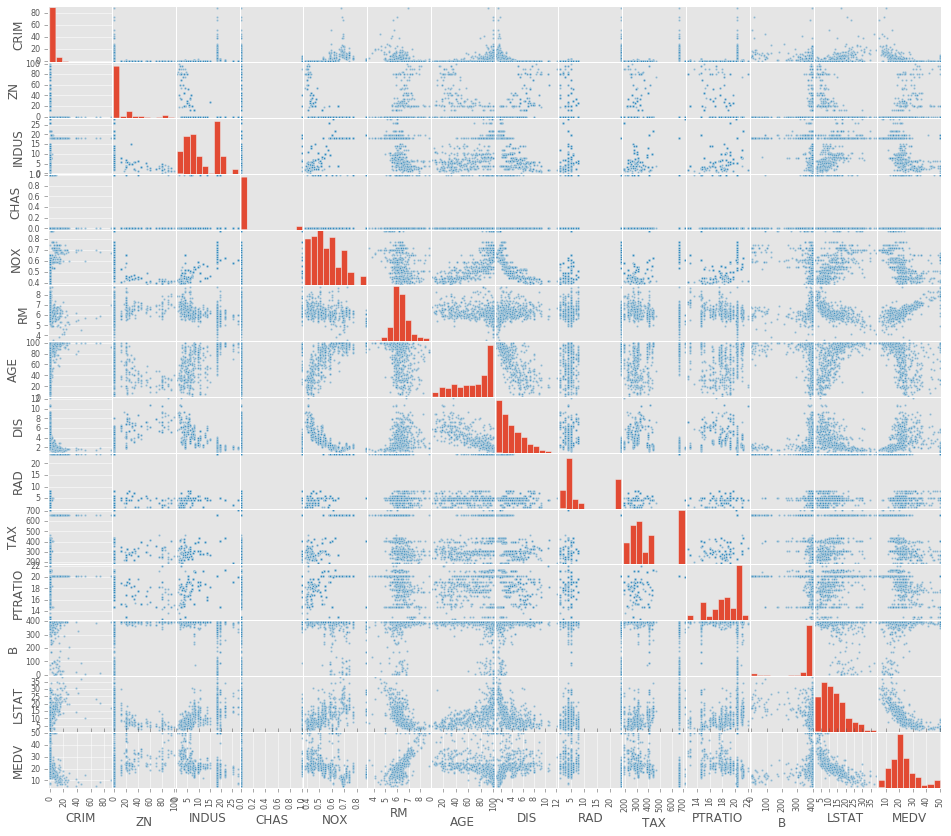

In [4]:
# Scatter-plot to see the predictor-response relationships
# We scatter-plot all because some of the predictors could be highly correlated and we should see that.
scatter_matrix(boston_df,figsize=(16,14),alpha=0.5);

## Multiple Linear Regression

In [5]:
# Create a design matrix consisting of all the predictors
X = sm.add_constant(boston_df.iloc[:,1:])
y = boston_df.CRIM

estimate = sm.OLS(y,X).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     30.73
Date:                Thu, 30 Jun 2016   Prob (F-statistic):           2.04e-55
Time:                        12:35:28   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     492   BIC:                             3399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         17.4184      7.270      2.396      0.0

#### We can now reject the null hypothesis $\beta_i=0$ for ZN, NOX, DIS, RAD and MEDV predictors. The reason many of the predictors are not significant in the multiple regression is because some of the predictors are correlated with each other. When we do multiple regression we determine a single coeffecient while holding all other predictors constant. Thus predictors that are correlated are revealed to be insignificant.

## Compare Univariate to Multivariate Coeffecients

In [6]:
# get the parameters of the multiple linear regression coeffecients (ignoring the constant)
ml_regression = estimate.params[1:]

# get the univariate regression coeffecients
params_dict = defaultdict(float)
# for each predictor extract the params[1] (beta_1) element from the estimate obj
for predictor in estimates.keys():
    params_dict[predictor] = estimates[predictor].params[1]

# convert to a Series to match ml_regression
univ_regression = pd.Series(params_dict)

regression_df = pd.concat([univ_regression, ml_regression],axis=1)
print(regression_df)

                 0          1
AGE       0.107131   0.002011
B        -0.035535  -0.006855
CHAS     -1.871545  -0.741435
DIS      -1.542831  -0.994992
INDUS     0.506847  -0.061576
LSTAT     0.544406   0.121269
MEDV     -0.360647  -0.199218
NOX      30.975259 -10.645500
PTRATIO   1.144613  -0.278731
RAD       0.614137   0.588838
RM       -2.691045   0.381070
TAX       0.029563  -0.003746
ZN       -0.073521   0.044919


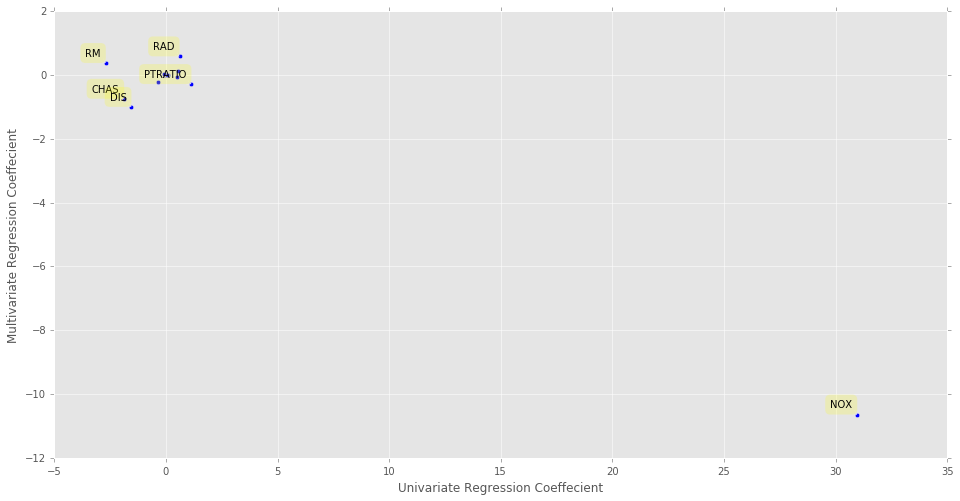

In [7]:
fig,ax = plt.subplots(figsize = (16,8))
ax.scatter(regression_df[0], regression_df[1]);

for label, x, y in zip(regression_df.index, regression_df[0].values, regression_df[1].values):
    if label in ['RM','CHAS','DIS', 'RAD', 'PTRATIO', 'NOX']:
        plt.annotate(label, xy = (x, y), xytext = (-5, 5), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

ax.set_xlabel('Univariate Regression Coeffecient');
ax.set_ylabel('Multivariate Regression Coeffecient');

## Perform Cubic Regressions

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     119.2
Date:                Thu, 30 Jun 2016   Prob (F-statistic):           2.65e-58
Time:                        12:58:35   Log-Likelihood:                -1670.0
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     502   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       52.9386      3.366     15.725   

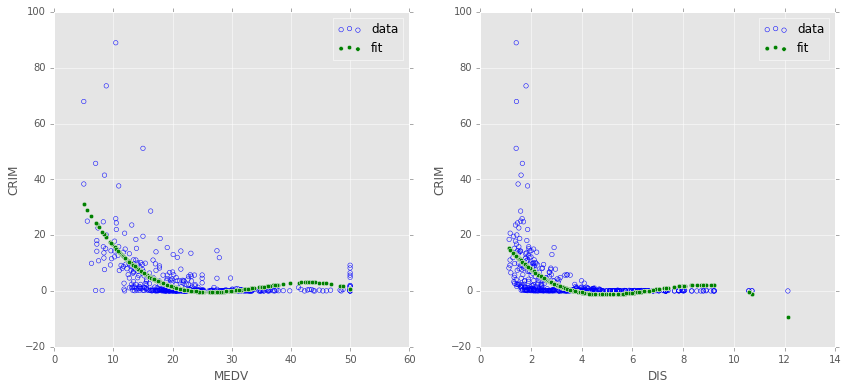

In [15]:
# We will fit a cubic regression for CRIM regressed onto the significant predictors DIS, RAD, MEDV
model_medv = smf.ols('CRIM ~ MEDV + I(MEDV**2)+I(MEDV**3)', data = boston_df)
estimate_medv = model_medv.fit()
print(estimate_medv.summary())

model_dis = smf.ols('CRIM ~ DIS + I(DIS**2)+I(DIS**3)', data = boston_df)
estimate_dis = model_dis.fit()
print(estimate_dis.summary())

model_rad = smf.ols('CRIM ~ RAD + I(RAD**2)+I(RAD**3)', data = boston_df)
estimate_rad = model_dis.fit()
print(estimate_rad.summary())

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# Plot 'CRIM', 'MEDV' 
ax1.scatter(boston_df.MEDV.values,boston_df.CRIM.values, facecolor = 'none', edgecolor = 'b', label = 'data');
ax1.scatter(boston_df.MEDV.values, estimate_medv.fittedvalues, facecolor = 'g', label='fit');
ax1.set_xlabel('MEDV');
ax1.set_ylabel('CRIM');
ax1.legend(loc='best');

# Plot 'CRIM', 'DIS'
ax2.scatter(boston_df.DIS.values,boston_df.CRIM.values, facecolor = 'none', edgecolor = 'b', label = 'data');
ax2.scatter(boston_df.DIS.values, estimate_dis.fittedvalues, facecolor = 'g', label='fit');
ax2.set_xlabel('DIS');
ax2.set_ylabel('CRIM');
ax2.legend(loc='best');

#### There is evidence of non-linear associations between predictor and responses because the quadratic and cubic terms are significant in these models.